<a href="https://colab.research.google.com/github/nikhilgang/DEEP-LEARNING_implementation/blob/master/MNIST_digit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from google.colab.patches import cv2_imshow
np.random.seed(123) 
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten  
from keras.layers import Convolution2D, MaxPooling2D 

from keras.utils import np_utils

from keras.datasets import mnist 

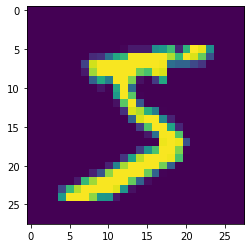

In [19]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() 
plt.imshow(X_train[0])
plt.show()

In [0]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)


In [0]:
model = Sequential()

model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28,28,1))) 
model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


In [0]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [23]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=1, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/1
60000/60000 [==============================] - 16s 269us/step - loss: 0.1886 - accuracy: 0.9423


In [24]:
for i in np.random.choice(np.arange(0, len(Y_test)), size = (10,)):
	
	probs = model.predict(X_test[np.newaxis, i])
	prediction = probs.argmax(axis=1)
 
	image = (X_test[i] * 255).reshape((28, 28)).astype("uint8")
 
	print("Actual digit is {0}, predicted {1}".format(Y_test[i], prediction[0]))
	cv2_imshow(image)

Actual digit is [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.], predicted 2


Actual digit is [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.], predicted 8


Actual digit is [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.], predicted 2


Actual digit is [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.], predicted 3


Actual digit is [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.], predicted 9


Actual digit is [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.], predicted 9


Actual digit is [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.], predicted 1


Actual digit is [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.], predicted 0


Actual digit is [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.], predicted 9


Actual digit is [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.], predicted 4
